<img src="https://3a2vzv37nkuw3esf6a3u2t7s-wpengine.netdna-ssl.com/webcentral/wp-content/uploads/sites/267/2019/02/horizontaldarkbackground.jpg" width="55%" align="left"> 
<br><br><br><br><br>
<font size=3 color='#08088A'>
<b>CSCI250 Python Computing: Building a Sensor System</b> <br><br>
Capstone final report
</font>
<hr style="height:5px" width="55%" align="left">

# Potato Controller

Insert one or more pictures of your project. 
You can do this by clicking **Edit** in the menu bar, then **Insert Image**.

# Group 

List all members and indicate specific project responsibilities:

* **Anthony Logan**  - Main coder.

    Created code that took inputs from joystick and applied them to keyeboard presses (WSAD). Created code that allows push buttons to have function in game. Assisted in hardware assembly. 


* **Frankie Austin** - Main Hardware

    Designed and 3D printed a case for the raspberry pi with cutouts for sensors. Assembled sensors and raspberry pi to form the final design.
    
    
*  **John Woolf** - Musician

    Created a program that can read notes and convert them to individual frequencies. Used 4 buzzers to play music such as the Wii themesong. 
    
    
* **Matthew Barbattini** - Secretary and Support

    Completed updates, assisted in code development, and wrote final report.

# Description

Our team has created a game controller akin to classic nintendo controllers. Our controller uses 2 joysticks and 4 push buttons that act as a D-Pad . A speaker is built into the controller using 4 buzzers that can play music similar to the game. The system (excluding the speakers) sits inside a 3D printed case designed specifically for _ergonomic function_.

# Hardware

- 2x Joystick
- 4x Buzzers
- 4x Push Buttons
- 2x ADC


# Operation

The left joystick controls movement like using the WASD keys on a computer. The push buttons act as a D-Pad on a controller and have specific functions for the game being played. We wanted the right control stick to controll camera for more advanced games. But unfortunately, we were unable to control both joysticks at once due to bugs with multiple ADC's, so only a single functions at this time. 

# Data

As stated in the capstone guidelines notebook, your project must have 4 data components:

1. **Collect** data
2. **Process** data
3. **Display** data
4. **Interpret** data

Include a description of the data you collected, what processing you did, graphs/plots/visuals created by your code, and your interpretation/analysis of the data. 

There is no need to include raw data unless it helps your explanation.

* The joystick has two connections for vertical and horizontal position. These ouputs are sent through the ADC and give numbers between 0 and 1023. First, we tested what position on the joystick corresponded to some horizontal and vertical values, and then created a graph of this coordinate system. We converted these position outputs into polar coordinates, and interpreted the angles into ranges that correspond to the WASD keys. We made sure to include ranges where both keys are pressed at the same time, such as wanting to move northeast instead of just north. We wanted to have no movement when the joystick is idle, so we did not allow for the continuous reading to occur if the radius of our coordinate system was less than some minimum value.

In [ ]:
# Example graph of joystick mapping
import math
import time
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(0, 1023, 1023)
ys = 511.5 * np.ones(1023, dtype=float)

graph, polar = plt.subplots()

plt.axis([0, 1023, 0, 1023])
plt.xlabel('x Position')
plt.ylabel('y Position')

plt.title("Diagram of Joystick Conversion", fontsize=20,loc='center', pad=30)
plt.polar(511.5)
plt.plot(xs, ys, 'b')

# Wiring

* The controller's wiring is an amalgamation of each sensors respective ports. The buttons, joysticks and the buzzer are all connected with their own power source and ground. Both joysticks are also connected to a respective ADC since one joystick requires 2 channels in order to read every direction. Both ADC's are connected to the same breadboard, and each of the wires extend from the controller to the breadboard as well. In order to maximize wiring visibility and efficiency, two power and ground strips were made on each side of the board. This streamlined the way by which we wired the controller while also keeping the board neat for the video and the pictures. 

# Joysticks:  

* The general convention that we made in order to wire the joysticks is: "Green-Hortizontal, Yellow-Vertical". Each horizontal wire was connected to channel 0 of the ADC and each vertical wire was connected to channel 1 of the ADC. Since two ADC's were needed in order to read both inputs, one ADC was connected with CE0 and the other with CE1. 
* Each joystick had a different purpose. Our right joystick was designated to be in charge of all movement made by the player. Our left joystick was designated to the control the camera the player was using. 

# Push Buttons:

* Each button was connected to GPIO Pins 19-22. Each of them were grounded via a grounding strip on the breadboard. Each button had their own purpose as well. In the reference frame of the game 'Minecraft', our green button was our "strike" button, which was in charge of hitting blocks with whichever weapon was equipped. The blue button was our "set" button that would set blocks on the ground. Our yellow button is our "jump" button which made the avatar jumped when pressed. The red button was our "selector" button which was made to rotate through the player's inventory. Each button can be held in order to perform the action repeatedly. 
 
# Buzzers: 
* Our buzzer is connected to GPIO Pin 13 in order to access the optimal PWM for our action response system. Upon pressing a button, the buzzer will emit a note of a different frequency depending on the button that is pressed, which is akin to auditory feedback the player should get when playing a game and giving inputs to the avatar via their controller. 
* Additionally, we have a 4 speaker setup that interperts a file format designed for harmony. This uses 4 speakers and references a file of your choosing, and will serenade you while you frag in minecraft.

# Code

Include all the code that makes your project run. It can be in a single code cell or split between many cells, whatever you prefer. Add documentation to explain what different portions of your code do.

<ipython-input-4-1ee364bc9134>:15: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  plt.polar(511.5)
<ipython-input-4-1ee364bc9134>:15: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  plt.polar(511.5)


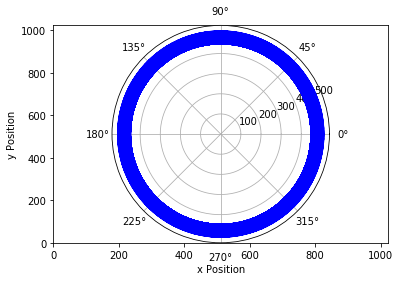

In [4]:
# Example graph of joystick mapping
import math
import time
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(0, 1023, 1023)
ys = 511.5 * np.ones(1023, dtype=float)

graph, polar = plt.subplots()

plt.axis([0, 1023, 0, 1023])
plt.xlabel('x Position')
plt.ylabel('y Position')

plt.polar(511.5)
plt.plot(xs, ys, 'b')

## Helper Functions for inside the control loop

In [ ]:
import adcUtil  as adc
import math
import RPi.GPIO as GPIO
import adcUtil as adc
import numpy as np
import pigpio
import time


# Reads the cartesian value of the left stick from ADC CE0
def getStickL():
    xpos = adc.baseADC0(channel=1)
    ypos = adc.baseADC0(channel=0)
    # -511.5 to center output on 0, from -511 to 511
    return (xpos-511.5), (ypos-511.5)

# Reads the cartesian value of the right stick from ADC CE1
def getStickR():
    xpos = adc.baseADC1(channel=1)
    ypos = adc.baseADC1(channel=0)
    return (xpos-511.5), (ypos-511.5)

# With a radius and theta value, press the right key(s)
def getStickKey(r,theta):
    
    # If the analog stick is near the middle/neutral position, do nothing
    if (r < 100): 
        releaseAll();
        return;
    
    # W D
    if (theta > 30 and theta < 60):
        releaseAll();
        keyboard.press('w')
        keyboard.press('d')   
        
    # W
    elif (theta > 60 and theta < 120):
        releaseAll();        
        keyboard.press('w') 
        
    # W A
    elif (theta > 120 and theta < 150):
        releaseAll();
        keyboard.press('w')
        keyboard.press('a') 
        
    # A
    elif (theta > 150 and theta < 210):
        releaseAll();        
        keyboard.press('a')  
        
    # A S
    elif (theta > 210 and theta < 240):
        releaseAll();
        keyboard.press('a')
        keyboard.press('s') 
        
    # S
    elif (theta > 240 and theta < 300):
        releaseAll();        
        keyboard.press('s')
        
    # S D
    elif (theta > 300 and theta < 330):
        releaseAll();
        keyboard.press('s')
        keyboard.press('d') 
        
    # D
    elif (theta > 330 or (theta) < 30):
        releaseAll();        
        keyboard.press('d') 
    else:
        return;    

# Catch all function to release every key to simulate holding down keys
def releaseAll():
    keyboard.release('w')
    keyboard.release('a')
    keyboard.release('s')
    keyboard.release('d')
    
# Return the theta when given cartesian x y
def angle(dx, dy):    
    rads = math.atan2(dy, dx)
    rads %= 2 * math.pi
    return math.degrees(rads)

# Return radius when given cartesian x y
def radi(dx, dy):
    r = math.sqrt(dx ** 2 + dy ** 2)
    return r

# Beeps a unique note per button when it's pressed
buzPin = 13
def beep(button):        
    # Sleep length, small value for short beep
    d = .05
        
    if button == 1:
        pi.hardware_PWM(buzPin, 261, int(.5e6))
        time.sleep(d)
        pi.hardware_PWM(buzPin, 0, int(.5e6))
            
    if button == 2:
        pi.hardware_PWM(buzPin, 291, int(.5e6))
        time.sleep(d)
        pi.hardware_PWM(buzPin, 0, int(.5e6))
        
    if button == 3:
        pi.hardware_PWM(buzPin, 331, int(.5e6))
        time.sleep(d)
        pi.hardware_PWM(buzPin, 0, int(.5e6))
            
    if button == 4:
        pi.hardware_PWM(buzPin, 349, int(.5e6))
        time.sleep(d)
        pi.hardware_PWM(buzPin, 0, int(.5e6))

## Control Loop (where the magic happens)

In [ ]:
import sys
# !{sys.executable} -m pip install pynput
import numpy as np
import time
from pynput.keyboard import Key, Controller
from pynput.mouse import Button, Controller as c
import spidev 
import RPi.GPIO as GPIO

# Button/buzzer pins
bright = 19
bup = 20
bleft = 21
bdown = 22
buzPin = 13

pi = pigpio.pi(port = 8887)

# Sets button and buzzer pins
GPIO.setmode(GPIO.BCM)
GPIO.setup(buzPin, GPIO.OUT) 
GPIO.setup(bright, GPIO.IN, pull_up_down = GPIO.PUD_DOWN)
GPIO.setup(bup, GPIO.IN, pull_up_down = GPIO.PUD_DOWN)
GPIO.setup(bleft, GPIO.IN, pull_up_down = GPIO.PUD_DOWN)
GPIO.setup(bdown, GPIO.IN, pull_up_down = GPIO.PUD_DOWN)

# Create the keyboard and mouse objects
keyboard = Controller()
mouse = c()

# The button layout on the controller, when reading top to bottom you will have
# Up left down right (clockwise)
# ^ > v <
while True:    
    # Press the up arrow
    if GPIO.input(bup):    
        beep(1)
        keyboard.press(Key.up)
        time.sleep(.1)
        keyboard.release(Key.up)
        
    # Right click on the mouse
    if GPIO.input(bright):    
        beep(2)
        mouse.press(Button.right)
        time.sleep(.1)
        mouse.release(Button.right)

    # Left click on the mouse
    if GPIO.input(bdown):
        beep(3)
        mouse.press(Button.left)
        time.sleep(.1)
        mouse.release(Button.left)

    # Press spacebar (usually bound to jump)
    if GPIO.input(bleft):
        beep(4)
        keyboard.press(Key.space)
        time.sleep(.1)       
        keyboard.release(Key.space)
    
    # Left stick function when we almost got it working
    # x_posL, y_posL = getStickL()
    # Get Cartesian for right stick
    x_posR, y_posR = getStickR()
    # Convert to radius for right stick
    rR = radi(x_posR, y_posR)
    # Convert to theta for right stick
    thetaR = angle(x_posR, y_posR)
    # Press the wasd key according to r and theta
    getStickKey(rR, thetaR)
    time.sleep(.1)

## Helper testing function (prints ADC/analog stick reading)

In [ ]:
# This is a helper block only used in testing, helped us print out the 
# analog stick values and see if we had them properly hooked up.
# This also aided in the cause for determining tolerances and axis 
# for the coordinate system.
to = time.time();

while time.time()<(to+20) or False:
    #r, theta = getStickKey()
    # x_posL, y_posL = getStickL()
    x_posR, y_posR = getStickR()
    #print("Polar Left: ({0:.0f},{1:.0f})".format(radi(x_posL, y_posL),angle(x_posL, y_posL)))
    print("Polar Right: ({0:.0f},{1:.0f})".format(radi(x_posR, y_posR),angle(x_posR, y_posR)))

    # print("Points Left: ({0:.0f},{1:.0f})".format(x_posL,y_posL))
    # print("Points Right: ({0:.0f},{1:.0f})".format(x_posR,y_posR))

    #print(x_pos, y_pos)

    time.sleep(.8)
    
#r, theta = getStickKey()


In [ ]:
# Music player


# Credits

Include references to all code you used in your project. If it's a library, provide name, version and download link.